### TD 1 : Collecte des données NLP

In [1]:
import requests
import pandas as pd

# Your API key and URL
api_key = "1c2134c1e8b14f4094bd2759a72d9297"
url = f"https://newsapi.org/v2/everything?q=tesla&from=2024-11-20&sortBy=publishedAt&apiKey={api_key}"

# Send request to NewsAPI
response = requests.get(url)
if response.status_code == 200:  # Status 200 means OK
    data = response.json()
    
    # Extract articles
    articles = data.get('articles', [])
    titles = [article['title'] for article in articles]
    descriptions = [article['description'] for article in articles]
    urls = [article['url'] for article in articles]
    
    # Save to a DataFrame
    df = pd.DataFrame({
        'Title': titles,
        'Description': descriptions,
        'URL': urls
    })
    
    # Save to CSV
    df.to_csv('tesla_articles.csv', index=False)
    print("Data saved to 'tesla_articles.csv'.")
else:
    print(f"Failed to fetch articles. Status code: {response.status_code}")


Data saved to 'tesla_articles.csv'.


In [3]:
import os

# Print the current working directory
print("Current working directory:", os.getcwd())


Current working directory: /Users/breukss


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Define the target website
url = "https://www.bbc.com/news/technology"

# Step 2: Fetch the webpage content
response = requests.get(url)
if response.status_code == 200:  # Check if the request was successful
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Step 3: Extract titles and summaries
    titles = [tag.text.strip() for tag in soup.find_all('h3', class_='gs-c-promo-heading__title')]
    summaries = [tag.text.strip() for tag in soup.find_all('p', class_='gs-c-promo-summary')]
    
    # Step 4: Save to a DataFrame and CSV
    df = pd.DataFrame({'Title': titles, 'Summary': summaries})
    df.to_csv('bbc_tech_news.csv', index=False)
    print("Data saved to 'bbc_tech_news.csv'.")
else:
    print(f"Failed to fetch the webpage. Status code: {response.status_code}")


In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Define the target Medium article URL
url = "https://medium.com/@VK_Venkatkumar/segmentation-traditional-deep-learning-approaches-edd50a3308b3"

# Step 2: Fetch the webpage content
response = requests.get(url)
if response.status_code == 200:  # Check if the request was successful
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Step 3: Extract the title
    title_tag = soup.find('h1')  # Adjust the tag if needed
    title = title_tag.text.strip() if title_tag else "Title not found"
    
    # Step 4: Extract the author's name
    author_tag = soup.find('span', class_='ds-link')  # Look for the correct class
    author = author_tag.text.strip() if author_tag else "Author not found"
    
    # Step 5: Extract the main content
    content_tags = soup.find_all('p')  # Adjust tag/class as needed for content
    content = [tag.text.strip() for tag in content_tags]
    
    # Save extracted data to a DataFrame
    df = pd.DataFrame({
        'Title': [title],
        'Author': [author],
        'Content': ['\n'.join(content)]
    })
    
    # Save to a CSV file
    df.to_csv('medium_article.csv', index=False)
    print("Data saved to 'medium_article.csv'.")
else:
    print(f"Failed to fetch the webpage. Status code: {response.status_code}")


Data saved to 'medium_article.csv'.


In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Define the target website
url = "https://www.bbc.com/news/technology"

# Step 2: Fetch the webpage content
response = requests.get(url)
if response.status_code == 200:  # Check if the request was successful
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Step 3: Extract titles and summaries
    titles = [tag.text.strip() for tag in soup.find_all('h3', class_='gs-c-promo-heading__title')]
    summaries = [tag.text.strip() for tag in soup.find_all('p', class_='gs-c-promo-summary')]
    
    # Step 4: Save to a DataFrame and CSV
    df = pd.DataFrame({'Title': titles, 'Summary': summaries})
    df.to_csv('bbc_tech_news.csv', index=False)
    print("Data saved to 'bbc_tech_news.csv'.")
else:
    print(f"Failed to fetch the webpage. Status code: {response.status_code}")


Data saved to 'bbc_tech_news.csv'.


### TD2 : Nettoyage des données

In [1]:
import requests
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk

# Download NLTK resources (run once)
nltk.download('punkt')
nltk.download('wordnet')

# Step 1: Fetch data from NewsAPI
api_url = "https://newsapi.org/v2/everything?q=apple&from=2024-12-19&to=2024-12-19&sortBy=popularity&apiKey=1c2134c1e8b14f4094bd2759a72d9297"
response = requests.get(api_url)
if response.status_code == 200:  # Check if the request was successful
    data = response.json()
    articles = data.get('articles', [])
    
    # Extract titles, descriptions, and URLs
    titles = [article['title'] for article in articles]
    descriptions = [article['description'] for article in articles]
    urls = [article['url'] for article in articles]
    
    # Create a DataFrame
    df = pd.DataFrame({'Title': titles, 'Description': descriptions, 'URL': urls})
else:
    print(f"Failed to fetch articles. Status code: {response.status_code}")
    df = pd.DataFrame()  # Empty DataFrame for fallback

# Step 2: Cleaning Function
def clean_text(text):
    if not isinstance(text, str):  # Handle non-string values
        return ""
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # Remove links
    text = re.sub(r"[^a-zA-Z\s]", '', text)  # Remove special characters and numbers
    text = text.lower().strip()  # Convert to lowercase and remove spaces
    return text

# Apply cleaning to descriptions
df['Cleaned_Description'] = df['Description'].apply(clean_text)

# Step 3: Tokenization
nltk.download('stopwords')
df['Tokens'] = df['Cleaned_Description'].apply(word_tokenize)

# Step 4: Normalization (Stemming and Lemmatization)
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def normalize_tokens(tokens):
    stemmed = [stemmer.stem(token) for token in tokens]
    lemmatized = [lemmatizer.lemmatize(token) for token in tokens]
    return {"Stemmed": stemmed, "Lemmatized": lemmatized}

df['Normalized'] = df['Tokens'].apply(normalize_tokens)

# Step 5: Save Cleaned Data
df.to_csv('cleaned_newsapi_articles2.csv', index=False)
print("Cleaned data saved to 'cleaned_newsapi_articles2.csv'.")


[nltk_data] Downloading package punkt to /Users/breukss/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/breukss/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/breukss/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Cleaned data saved to 'cleaned_newsapi_articles2.csv'.


In [3]:
import re
import pandas as pd

# Step 1: Load the data
file_path = "cleaned_newsapi_articles2.csv"  # Replace with your file path
df = pd.read_csv(file_path)

# Step 2: Define a cleaning function
def clean_text(text):
    if not isinstance(text, str):
        return ""
    # Remove hyperlinks
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    # Remove special characters
    text = re.sub(r"[^a-zA-Z\s]", '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove unnecessary spaces
    text = re.sub(r"\s+", ' ', text).strip()
    return text

# Apply the cleaning function to the 'Description' column
df['Cleaned_Description'] = df['Description'].apply(clean_text)

# Step 3: Compare raw and cleaned texts
comparison_df = df[['Description', 'Cleaned_Description']]

# Step 4: Save the comparison for review
comparison_df.to_csv('comparison_cleaned_text.csv', index=False)

# Display a sample for analysis
print(comparison_df.head(10))


                                         Description  \
0                                          [Removed]   
1  The US Supreme Court has agreed to hear TikTok...   
2  You don’t usually see discounts on this Apple ...   
3  A British startup managed to shrink the Apollo...   
4  Reporters Without Borders has called for Apple...   
5  Interrogations, beatings, cramped quarters and...   
6  A recently spotted Samsung patent highlights a...   
7  I look back on Wear OS' path in 2024, from mes...   
8  An initial ruling by the U.S. International Tr...   
9  Apple plans to launch its next-generation Visi...   

                                 Cleaned_Description  
0                                            removed  
1  the us supreme court has agreed to hear tiktok...  
2  you dont usually see discounts on this apple p...  
3  a british startup managed to shrink the apollo...  
4  reporters without borders has called for apple...  
5  interrogations beatings cramped quarters and t... 

In [5]:
# Compare the raw and cleaned texts
comparison_df['Issues'] = comparison_df.apply(
    lambda row: "Potential Over-Cleaning" if any(c in row['Description'] for c in ['http', '@', '#', '%']) and not row['Cleaned_Description'] else "",
    axis=1
)

# Save issues to CSV for review
comparison_df.to_csv('analysis_of_cleaning_limits.csv', index=False)

# Print sample rows with potential issues
print(comparison_df[comparison_df['Issues'] != ""].head())


Empty DataFrame
Columns: [Description, Cleaned_Description, Issues]
Index: []


/var/folders/wv/mf6386gd3j53jpg38lhmc_mr0000gn/T/ipykernel_5424/1184306886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparison_df['Issues'] = comparison_df.apply(


### TD 3 : Analyse des Données Textuelles NLP

In [7]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
import nltk

# Download required NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Step 1: Load cleaned data
file_path = "comparison_cleaned_text.csv"  # Replace with your cleaned data file
df = pd.read_csv(file_path)

# Step 2: Tokenization
stop_words = set(stopwords.words('english'))

def tokenize_text(text):
    tokens = word_tokenize(text)
    return [token for token in tokens if token not in stop_words]

df['Tokens'] = df['Cleaned_Description'].apply(tokenize_text)

# Step 3: Stemming and Lemmatization
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def normalize_tokens(tokens):
    stemmed = [stemmer.stem(token) for token in tokens]
    lemmatized = [lemmatizer.lemmatize(token) for token in tokens]
    return {"Stemmed": stemmed, "Lemmatized": lemmatized}

df['Normalized'] = df['Tokens'].apply(normalize_tokens)

# Step 4: Save Results
df.to_csv('final_cleaned_data.csv', index=False)

# Step 5: Compare Stemming and Lemmatization Results
for index, row in df.head(5).iterrows():
    print(f"Original Tokens: {row['Tokens']}")
    print(f"Stemmed Tokens: {row['Normalized']['Stemmed']}")
    print(f"Lemmatized Tokens: {row['Normalized']['Lemmatized']}")
    print("-" * 50)

print("Data saved to 'final_cleaned_data.csv'.")


Original Tokens: ['removed']
Stemmed Tokens: ['remov']
Lemmatized Tokens: ['removed']
--------------------------------------------------
Original Tokens: ['us', 'supreme', 'court', 'agreed', 'hear', 'tiktok', 'owner', 'bytedances', 'appeal', 'law', 'could', 'ban', 'app', 'protecting', 'americans', 'foreign', 'adversary', 'controlled', 'applications', 'act', 'set', 'go', 'effect', 'january', 'day', 'presidentelect', 'donald']
Stemmed Tokens: ['us', 'suprem', 'court', 'agre', 'hear', 'tiktok', 'owner', 'byted', 'appeal', 'law', 'could', 'ban', 'app', 'protect', 'american', 'foreign', 'adversari', 'control', 'applic', 'act', 'set', 'go', 'effect', 'januari', 'day', 'presidentelect', 'donald']
Lemmatized Tokens: ['u', 'supreme', 'court', 'agreed', 'hear', 'tiktok', 'owner', 'bytedances', 'appeal', 'law', 'could', 'ban', 'app', 'protecting', 'american', 'foreign', 'adversary', 'controlled', 'application', 'act', 'set', 'go', 'effect', 'january', 'day', 'presidentelect', 'donald']
----------

[nltk_data] Downloading package punkt to /Users/breukss/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/breukss/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/breukss/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
from collections import Counter
import pandas as pd

# Load the cleaned data
file_path = "final_cleaned_data.csv"  # Replace with your cleaned data file path
df = pd.read_csv(file_path)

# Combine all tokens into a single list
all_tokens = [
    token for tokens_list in df['Tokens']
    for token in eval(tokens_list)  # Convert stringified list back to a list
]

# Compute word frequencies
word_counts = Counter(all_tokens)
most_common_words = word_counts.most_common(20)

# Display most common words
print("Top 20 Most Frequent Words:")
for word, count in most_common_words:
    print(f"{word}: {count}")


Top 20 Most Frequent Words:
de: 67
apple: 60
la: 28
que: 26
en: 24
el: 16
ios: 15
iphone: 13
ha: 13
los: 13
una: 13
new: 11
intelligence: 10
apples: 10
por: 10
con: 9
mac: 9
airtag: 9
app: 8
first: 8


In [38]:
pip install wordcloud


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.9/168.9 kB 3.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


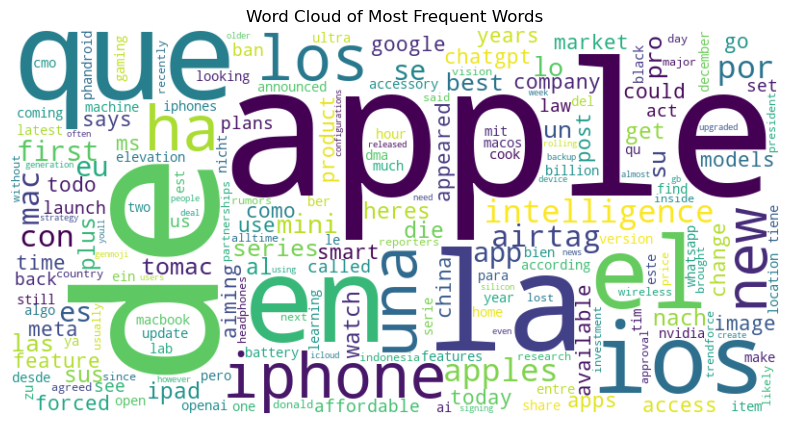

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Most Frequent Words")
plt.show()


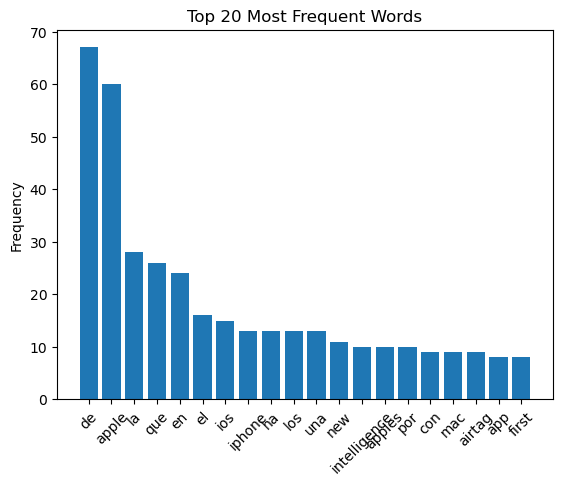

In [13]:
# Plot word frequencies
words, counts = zip(*most_common_words)
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title("Top 20 Most Frequent Words")
plt.ylabel("Frequency")
plt.show()


In [14]:
from textblob import TextBlob

# Compute sentiment polarity for each cleaned description
df['Sentiment_Polarity'] = df['Cleaned_Description'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Visualize the sentiment distribution
plt.hist(df['Sentiment_Polarity'], bins=20, color='blue', edgecolor='black')
plt.title("Sentiment Polarity Distribution")
plt.xlabel("Polarity")
plt.ylabel("Frequency")
plt.show()

# Display example texts with polarities
print("Example Sentiments:")
for index, row in df.head(5).iterrows():
    print(f"Text: {row['Cleaned_Description']}")
    print(f"Sentiment Polarity: {row['Sentiment_Polarity']}")
    print("-" * 50)


ModuleNotFoundError: No module named 'textblob'

Top 20 Most Frequent Words (Stopwords Removed):
apple: 60
ios: 15
iphone: 13
new: 11
intelligence: 10
apples: 10
mac: 9
airtag: 9
app: 8
first: 8
mini: 7
series: 6
best: 6
tomac: 6
pro: 6
watch: 5
ipad: 5
heres: 5
nach: 5
die: 5


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/breukss/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


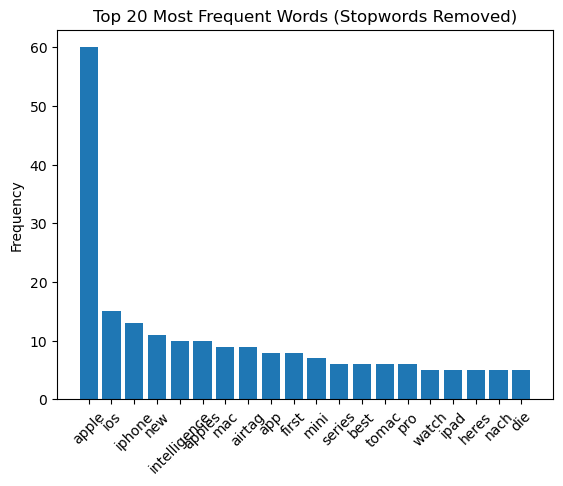

In [16]:
from nltk.corpus import stopwords

# Download stopwords for additional languages
nltk.download('stopwords')
stop_words = set(stopwords.words('english') + stopwords.words('spanish') + stopwords.words('french'))

# Filter out stopwords from tokens
filtered_tokens = [token for token in all_tokens if token not in stop_words]

# Recompute word frequencies
filtered_word_counts = Counter(filtered_tokens)
filtered_most_common_words = filtered_word_counts.most_common(20)

# Display the refined list of most frequent words
print("Top 20 Most Frequent Words (Stopwords Removed):")
for word, count in filtered_most_common_words:
    print(f"{word}: {count}")

# Visualize the filtered word frequencies
words, counts = zip(*filtered_most_common_words)
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title("Top 20 Most Frequent Words (Stopwords Removed)")
plt.ylabel("Frequency")
plt.show()


In [18]:
pip install textblob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 7.3 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


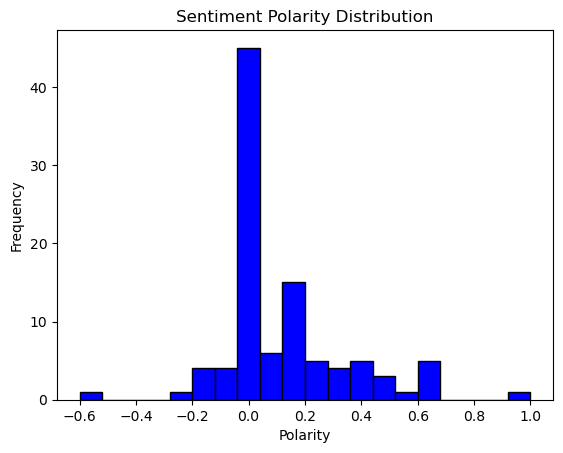

Example Sentiments:
Text: removed
Sentiment Polarity: 0.0
--------------------------------------------------
Text: the us supreme court has agreed to hear tiktok owner bytedances appeal of a law that could ban the app the protecting americans from foreign adversary controlled applications act is set to go into effect on january the day before presidentelect donald
Sentiment Polarity: -0.125
--------------------------------------------------
Text: you dont usually see discounts on this apple pencil but its nearly off today
Sentiment Polarity: -0.075
--------------------------------------------------
Text: a british startup managed to shrink the apollo guidance computer down to the size of an apple watch
Sentiment Polarity: -0.07777777777777778
--------------------------------------------------
Text: reporters without borders has called for apple to remove apple intelligence
Sentiment Polarity: 0.0
--------------------------------------------------


In [15]:
from textblob import TextBlob

# Compute sentiment polarity for each cleaned description
df['Sentiment_Polarity'] = df['Cleaned_Description'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Visualize the sentiment distribution
plt.hist(df['Sentiment_Polarity'], bins=20, color='blue', edgecolor='black')
plt.title("Sentiment Polarity Distribution")
plt.xlabel("Polarity")
plt.ylabel("Frequency")
plt.show()

# Display example texts with polarities
print("Example Sentiments:")
for index, row in df.head(10).iterrows():
    print(f"Text: {row['Cleaned_Description']}")
    print(f"Sentiment Polarity: {row['Sentiment_Polarity']}")
    print("-" * 50)
